Starting from 21:25

Data Preprocessing

Nov. 8th 

*** Minding that there could be sel-loops ***

https://stackoverflow.com/questions/49340520/matplotlib-and-networkx-drawing-a-self-loop-node

Nov. 27th 

*** nx.draw() doesn't bother to draw self-loops ***

https://stackoverflow.com/questions/49340520/matplotlib-and-networkx-drawing-a-self-loop-node

#### Creating a headline list

dir_freq_rank = df_graph.director1.value_counts().to_frame().reset_index().rename(columns={'index':'director1','director1':'freq'})

dir_freq_rank.groupby('freq').size().reset_index()

dir_freq_rank.freq.hist()

#### Choosing Directors from three dimensions: Picking up the top 10 most frequent directors, top 10 most frequent directors, actors/actresses

dir_list_3lt = dir_freq_rank[dir_freq_rank['freq'] > 3]['director1'].to_list()

df_graphing = df_graph[df_graph.loc[:,'director1'].isin(dir_list_3lt)].reset_index(drop = True)

df_graphing

df_graphing['co_acts'] = df_graphing['ms1'].astype('str') + ',' + df_graphing['fs1'].astype('str') + ',' + df_graphing['ms2'].astype('str') + ',' + df_graphing['fs2'].astype('str') + ',' +  df_graphing['guests'].astype('str')

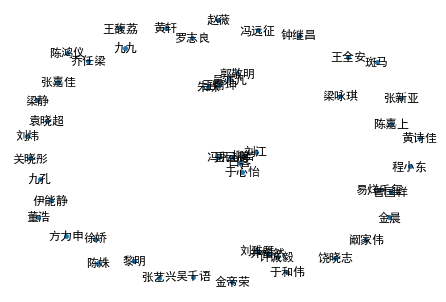

In [148]:
### We can induce a subgraph of the previous graph by 
### specifying which nodes should be in the subgraph

### Let's create a random sample of 30 people
sample= pd.Series(list(nodes_list)).sample(50)

### Call the subgraph function and pass the list of people
### In this case, we will pass our sample
SS= celebrity_network.subgraph(sample)

### Let's look at the subgraph
nx.draw(SS, node_size=15, width=0.5, with_labels = True)


In [62]:
df[df['ms2'] == '徐峥']

,name,box2019,director1,director2,ms1,fs1,ms2,fs2,guests,co_acts,co,indicator
117,人在囧途,0.467158,叶伟民,nan,王宝强,李小璐,徐峥,李曼,马健,"[叶伟民, 王宝强, 李小璐, 徐峥, 李曼, 马健]","[王宝强, 李小璐, 徐峥, 李曼, 马健]",0
367,春娇与志明,0.818925,彭浩翔,nan,余文乐,杨千桦,徐峥,杨幂,nan,"[彭浩翔, 余文乐, 杨千桦, 徐峥, 杨幂]","[余文乐, 杨千桦, 徐峥, 杨幂]",0
780,心花路放,12.905875,宁浩,nan,黄渤,袁泉,徐峥,周冬雨,nan,"[宁浩, 黄渤, 袁泉, 徐峥, 周冬雨]","[黄渤, 袁泉, 徐峥, 周冬雨]",0
1490,大唐玄奘,0.342962,霍建起,nan,黄晓明,楼佳悦,徐峥,车晓,罗晋,"[霍建起, 黄晓明, 楼佳悦, 徐峥, 车晓, 罗晋]","[黄晓明, 楼佳悦, 徐峥, 车晓, 罗晋]",0
2066,超时空同居,9.259765,苏伦,nan,雷佳音,佟丽娅,徐峥,陶虹,李念,"[苏伦, 雷佳音, 佟丽娅, 徐峥, 陶虹, 李念]","[雷佳音, 佟丽娅, 徐峥, 陶虹, 李念]",0
2108,江湖儿女,0.719683,贾樟柯,nan,廖凡,赵涛,徐峥,梁嘉艳,张一白,"[贾樟柯, 廖凡, 赵涛, 徐峥, 梁嘉艳, 张一白]","[廖凡, 赵涛, 徐峥, 梁嘉艳, 张一白]",0


In [101]:
df[df['ms2'] == '王千源']

,name,box2019,director1,director2,ms1,fs1,ms2,fs2,guests,co_acts,co,indicator


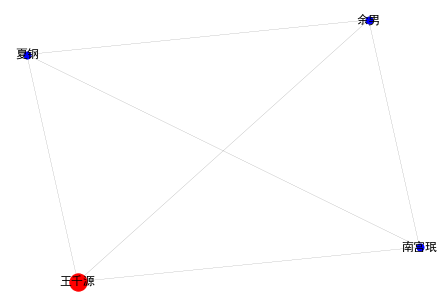

In [98]:
#### Ego-net is the network around a single person

###  Let's choose someone
hub='王千源'

### Build the ego net 
hub_ego = nx.ego_graph(celebrity_network, hub)

# Draw graph
pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, pos, node_color='b', node_size=50, width=0.1, with_labels=True)

# Draw ego as large and red
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[hub], node_size=300, node_color='r')

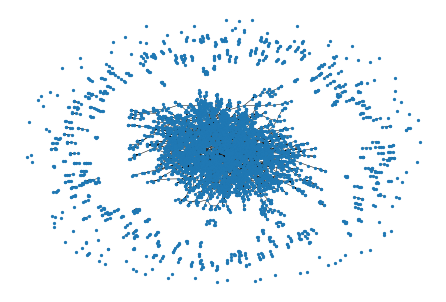

In [89]:
### Let's compute a spanning tree of the graph
T=nx.minimum_spanning_tree(celebrity_network)

### Visualize it!
nx.draw(T, node_size=5, width=0.5)

In [35]:
dc = nx.degree_centrality(celebrity_network)

In [32]:
network_metric  = pd.DataFrame(celebrity_network.degree).rename(columns={0:'celebrity',1:'num_degrees'})

In [33]:
network_metric

,celebrity,num_degrees
0,,20
1,崔轶,0
2,于紫菲,4
3,冯铁城,3
4,陈为军,2
...,...,...
5627,袁冬冬,4
5628,纪凯童,2
5629,张同祖,5
5630,史力嘉,4


In [36]:
dc_df = pd.DataFrame(dict(dc), index=[0]).T.reset_index().rename(columns={'index':'celebrity',0:'degree_centrality'})

In [37]:
network_metric_v1 = pd.merge(network_metric, dc_df, left_on='celebrity',right_on='celebrity',how='left')

In [39]:
bc_df = pd.DataFrame(dict(nx.betweenness_centrality(celebrity_network)), index=[0]).T.reset_index().rename(columns={'index':'celebrity',0:'betweenness_centrality'})

In [46]:
network_metric_v2 = pd.merge(network_metric_v1, bc_df, left_on='celebrity',right_on='celebrity',how='left')

In [45]:
cc_df = pd.DataFrame(dict(nx.closeness_centrality(celebrity_network)), index=[0]).T.reset_index().rename(columns={'index':'celebrity',0:'closeness_centrality'})

In [144]:
df_bi.to_csv('df_bi.csv',index=False)

In [47]:
network_metric_v3 = pd.merge(network_metric_v2, cc_df, left_on='celebrity',right_on='celebrity',how='left')

In [52]:
network_metric_v3[network_metric_v3['closeness_centrality'] == 0.2573313781050864]

,celebrity,num_degrees,degree_centrality,betweenness_centrality,closeness_centrality
2945,古天乐,123,0.021843,0.013275,0.257331


In [51]:
network_metric_v3.closeness_centrality.max()

0.2573313781050864

In [24]:
network_metric_csv = pd.read_csv('network_metric.csv')

In [29]:
network_metric_csv.num_degrees.max()

123

In [30]:
network_metric_csv[network_metric_csv['num_degrees'] == 123 ]

,celebrity,num_degrees,betweenness_centrality
2274,古天乐,123,0.257331


In [142]:
network_metric_v3.to_csv('network_metric.csv', index=False)

In [ ]:
import pickle

with 

In [215]:
aff.apply(pd.unique)
aff

director1
MTJJ木头                                                       [山新]
Nick·Wickham                                                [邓紫棋]
Raye                                                        [nan]
丁乃筝                                             [华少, 许晴, 陈武康, 车晓]
丁亮              [nan, 张伟, 张秉君, 张伟, 张秉君, 谭笑, 张伟, 张秉君, 尚雯婕, nan,...
                                      ...                        
齐迹                                            [梁辰羽, 樱雪, 李卫东, 代佳夕]
齐追航                                                 [阿星, 王雅婕, 房鑫]
龙毅                                      [陈柏霖, 林依晨, 李易峰, 苑新雨, 陆明君]
龚应恬                                                    [翁佳慧, 邵天帅]
龚桦                                                 [沈文俊, 覃文静, 恽岚]
Name: co_acts, Length: 1700, dtype: object

#### Defining a function where you may create graph of one year and relative metrics

In [51]:
agg= aff.apply(pd.Series)
agg

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
director1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
丁亮,张伟,张秉君,张伟,张秉君,谭笑,张伟,张秉君,尚雯婕,谭笑,宋祖儿,张伟,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
丁晟,成龙,林鹏,王力宏,刘烨,张梓琳,焦恩俊,刘承俊,成龙,景甜,刘烨,刘德华,刘烨,成龙,王凯,黄子韬,王凯,李梦,马天宇,王大陆,凌潇肃,金晨,贾乃亮,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
万玛才旦,西德尼玛,杨秀措,金巴,更登彭措,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
于胜军,吴磊,刘莹,林子杰,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
傅华阳,曾志伟,牛萌萌,陈思诚,东方闻樱,马健,张翰,郑爽,释行宇,何炅,谢娜,李维嘉,吴昕,杜海涛,邹兆龙,余男,释行宇,潘霜霜,安志杰,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
麦兆辉,古天乐,张静初,刘青云,吴彦祖,古天乐,黄奕,吴彦祖,叶璇,刘青云,甄子丹,孙俪,姜文,梁朝伟,周迅,王学兵,范晓萱,古天乐,周迅,刘青云,叶璇,吴彦祖,刘青云,林嘉欣,张家辉,袁咏仪,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
麦咏麟,田亮,胡静,何晟铭,杨幂,戚薇,汪东城,周秀娜,陈汉典,巩新亮,邹东孝,李小萌,黄一飞,盖玺,任达华,热依扎,霍建华,车晓,张赫,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
黄军,侯高俊杰,鞠萍,康璐洁,姜广涛,李佳怡,山新,凌云,唐小喜,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
bi= agg.stack()
bi

director1    
丁亮         0      张伟
           1     张秉君
           2      张伟
           3     张秉君
           4      谭笑
                ... 
黄真真        18    薛凯琪
           19     黎明
           20    王珞丹
           21    林俊杰
           22    张榕容
Length: 1899, dtype: object

In [53]:
bi_2= bi.reset_index(level=1,drop=True).reset_index()

In [54]:
bi_2.rename(columns = {'director1':'director', 0:'actor'}, inplace = True)

In [56]:
### This command builds a graph B with the egdes in the DataFrame
### we've just created
B= nx.from_pandas_edgelist(bi_2, 'director','actor')

### But it is not a bipartite graph yet..
### We need to tell NetworkX explicitly what nodes belong to which set.

### Let's add the nodes in the restaurant columns and declare that they are
### in the bipartite set 0
B.add_nodes_from(bi_2['director'], bipartite=0)
### Let's add the nodes in the 0 columns and declare that they are
### in the bipartite set 1
B.add_nodes_from(bi_2['actor'], bipartite=1)

### Side comment: We can recover both sets by the following command
#directors, actor=  nx.bipartite.sets(B)

In [57]:
Directors = {n for n, d in B.nodes(data=True) if d['bipartite'] == 0}
Actors = set(B) - Directors

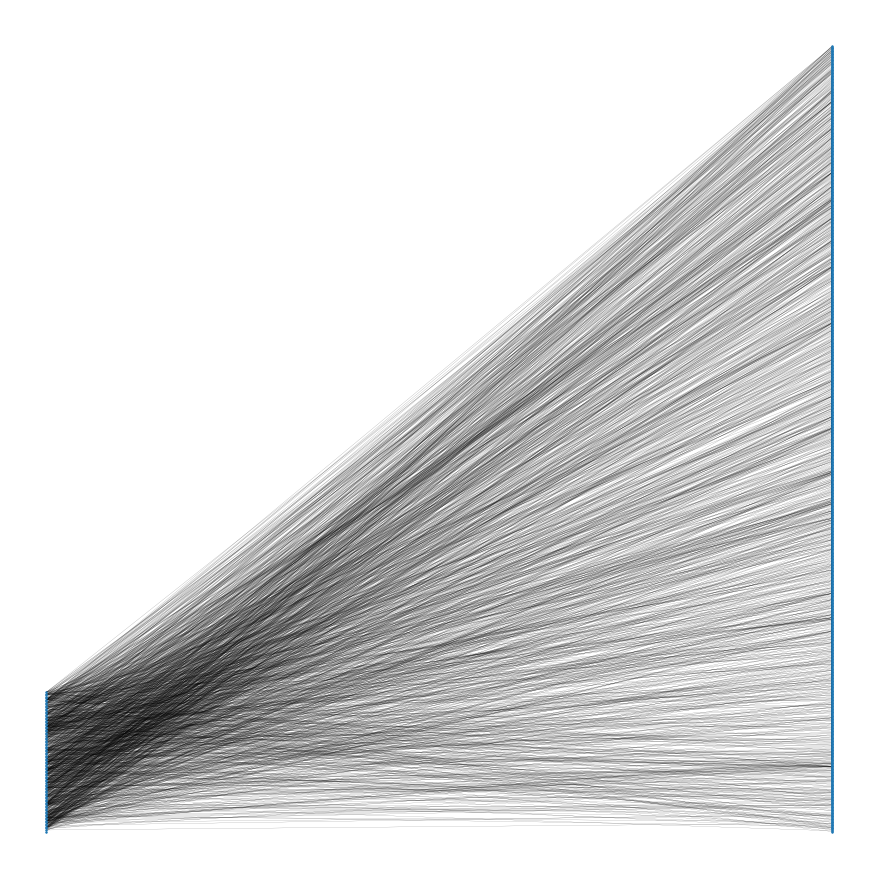

In [65]:
### Let's plot the bipartite graph

### Here we are going to display one set at horizontal position 1 
### and the other at position 2
### Check the documentation for nx.draw to learn about these options
plt.figure(3,figsize=(12,12)) 
pos= dict()
pos.update( (n, (1, 20*i)) for i, n in enumerate(Directors) ) # put nodes from X at x=1
pos.update( (n, (2, 10*i)) for i, n in enumerate(Actors) ) # put nodes from Y at x=2
nx.draw(B, pos=pos, node_size=2, width=0.1)
plt.show()

### Drawing Bipartite Function

In [99]:
dir_freq_rank.groupby('freq').size().reset_index()

,freq,0
0,1,1201
1,2,275
2,3,121
3,4,46
4,5,26
5,6,11
6,7,8
7,8,5
8,9,3
9,12,1


In [115]:
bip = pick_up(6)

In [116]:
bip

,director1,0
0,丁晟,成龙
1,丁晟,林鹏
2,丁晟,王力宏
3,丁晟,刘烨
4,丁晟,张梓琳
...,...,...
630,高峰,郑昊
631,高峰,张正阳
632,高峰,冯波
633,高峰,郝柏杰


In [69]:
def pick_up(n):
    
    dir_list = dir_freq_rank[dir_freq_rank['freq'] > n]['director1'].to_list()
    
    df_graphing = df_graph[df_graph.loc[:,'director1'].isin(dir_list)].reset_index(drop = True)
    
    df_graphing['co_acts'] = df_graphing['ms1'].astype('str') + ',' + df_graphing['fs1'].astype('str') + ',' + df_graphing['ms2'].astype('str') + ',' + df_graphing['fs2'].astype('str') + ',' +  df_graphing['guests'].astype('str')

    df_graphing['co_acts'] = df_graphing['co_acts'].apply(lambda x: x.replace(',nan', ''))
    
    df_graphing['co_acts'] = df_graphing['co_acts'].apply(lambda x: x.split(','))
    
    df_graphing_bi = df_graphing[['director1', 'co_acts']]
    
    df_graphing_bi = df_graphing_bi.dropna(axis = 0)
    
    df_graphing_bi['co_acts'] = [x.remove('nan') if 'nan' in x else x for x in df_graphing_bi['co_acts']]
    
    df_graphing_bi.dropna(inplace = True)
    
    aff = df_graphing_bi.groupby('director1')['co_acts'].agg(sum)
    
    aff.apply(pd.unique)
    
    agg= aff.apply(pd.Series)
    
    bi= agg.stack()
    
    bi_2= bi.reset_index(level=1,drop=True).reset_index()
    
    return(bi_2)
    

In [118]:
bip = pick_up(12)
bip

,director1,0
0,王晶,古天乐
1,王晶,徐熙媛
2,王晶,佟大为
3,王晶,小宋佳
4,王晶,梁家辉
...,...,...
107,邱礼涛,古天乐
108,邱礼涛,吴镇宇
109,邱礼涛,袁咏仪
110,邱礼涛,古天乐


In [121]:
df_graph[df_graph['ms1'] == '王宝强']

,name,box2019,director1,director2,ms1,fs1,ms2,fs2,guests
117,人在囧途,0.467158,叶伟民,NaN,王宝强,李小璐,徐峥,李曼,马健
288,hello！树先生,0.026340,韩杰,NaN,王宝强,何洁,王大治,谭卓,NaN
448,神通乡巴佬,0.047058,皮建鑫,NaN,王宝强,曹议文,曾志伟,NaN,NaN
1072,唐人街探案,8.960553,陈思诚,NaN,王宝强,佟丽娅,刘昊然,NaN,陈赫 小沈阳 肖央
1085,道士下山,4.344181,陈凯歌,NaN,王宝强,林志玲,张震,NaN,郭富城
1110,不可思异,1.208532,孙周,NaN,王宝强,辛芷蕾,董成鹏,NaN,小沈阳
1774,大闹天竺,7.962776,王宝强,NaN,王宝强,柳岩,白客,NaN,岳云鹏
2059,唐人街探案2,34.962210,陈思诚,NaN,王宝强,尚语贤,刘昊然,佟丽娅,肖央
2351,新喜剧之王,6.190000,周星驰,NaN,王宝强,鄂倩文,赖宇恒,景如洋,NaN


In [119]:
bip.shape

(112, 2)

In [107]:
def draw_bip(series):
    
    series.rename(columns = {'director1':'director', 0:'actor'}, inplace = True)
    
    B= nx.from_pandas_edgelist(series, 'director','actor')
    
    B.add_nodes_from(series['director'], bipartite=0)
    
    B.add_nodes_from(series['actor'], bipartite=1)
    
    Directors = {n for n, d in B.nodes(data=True) if d['bipartite'] == 0}
    
    Actors = set(B) - Directors
    
    plt.figure(3,figsize=(12,12)) 
    
    pos= dict()
    
    pos.update( (n, (1, 20*i)) for i, n in enumerate(Directors) ) # put nodes from X at x=1
    
    pos.update( (n, (2, 10*i)) for i, n in enumerate(Actors) ) # put nodes from Y at x=2
    
    nx.draw(B, pos=pos, node_size=2, width=0.1, with_labels = True)
    
    plt.show()

    return(Directors, Actors)
    
    
    

In [114]:
df_graphing_bi[df_graphing_bi['director1'] == '']

,director1,co_acts
0,吴宇森,"[梁朝伟, 赵薇, 金城武, 林志玲, 佟大为]"
1,张艺谋,"[孙红雷, 闫妮, 小沈阳, 赵本山]"
2,高群书,"[黄晓明, 周迅, 苏有朋, 李冰冰, 张涵予]"
3,陆川,"[刘烨, 高圆圆, 范伟, 秦岚]"
4,刘伟强,"[刘德华, 舒淇, 张涵予, 何韵诗, 张歆艺]"
...,...,...
538,张艺飞,"[龙武, 董昕赟, 孙蛟龙]"
539,张力,"[赵英俊, 谭卓, 张磊]"
540,苗述,"[陈国良, 吴美佳, 肖红, 蔡思宜]"
541,邱晓军,"[王韦智, 李佳蔚, 文熙]"


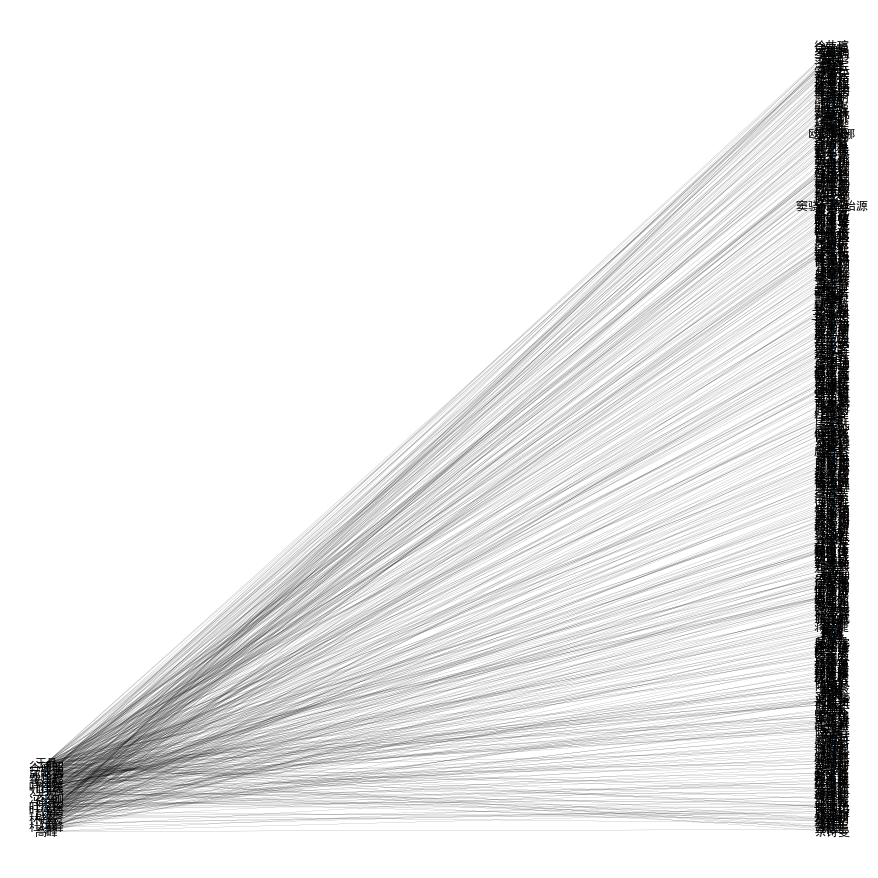

({'丁晟',
  '关尔',
  '冯小刚',
  '刘伟强',
  '叶伟信',
  '叶伟民',
  '叶念琛',
  '宁敬武',
  '彭发',
  '彭顺',
  '徐克',
  '杜琪峰',
  '林超贤',
  '王晶',
  '谷德昭',
  '邱礼涛',
  '霍建起',
  '高峰'},
 {'万绮雯',
  '丛珊',
  '于越',
  '任山',
  '任贤齐',
  '任达华',
  '何佩瑜',
  '何杜娟',
  '何浚尉',
  '何炅',
  '何达',
  '何韵诗',
  '佘诗曼',
  '余安安',
  '余少群',
  '余心恬',
  '余文乐',
  '余男',
  '余诗曼',
  '佟丽娅',
  '佟大为',
  '侯岩松',
  '元彪',
  '元秋',
  '冯丹莹',
  '冯波',
  '冯绍峰',
  '冯骏骅',
  '凌潇肃',
  '刘亦菲',
  '刘佩琦',
  '刘嘉玲',
  '刘德华',
  '刘心悠',
  '刘承俊',
  '刘桦',
  '刘烨',
  '刘芸',
  '刘若英',
  '刘镇伟',
  '刘雨轩',
  '刘青云',
  '勾峰',
  '包贝尔',
  '午马',
  '卢巧音',
  '卢秋宏',
  '卫诗雅',
  '古天乐',
  '叶璇',
  '向昊',
  '吕聿来',
  '吴亦凡',
  '吴京',
  '吴千语',
  '吴卓羲',
  '吴君如',
  '吴孟达',
  '吴尊',
  '吴彦祖',
  '吴昕',
  '吴樾',
  '吴镇宇',
  '周冬雨',
  '周星驰',
  '周杰伦',
  '周柏豪',
  '周楚楚',
  '周泓',
  '周润发',
  '周渝民',
  '周秀娜',
  '周迅',
  '唐嫣',
  '姚晨',
  '姜宏波',
  '姜武',
  '孔千千',
  '孙俪',
  '孙坚',
  '孙红雷',
  '孟瑶',
  '孟霞',
  '安志杰',
  '宋佳',
  '宋佳伦',
  '宋轶',
  '小宋佳',
  '巩汉林',
  '庄思敏',
  '应采儿',
  '庚澄庆',
  '廖启智',
  '廖羽翘',
  '张丰毅',
  '张健声',
  '张兆辉',
  

In [117]:
draw_bip(bip)

In [79]:
bip.director.unique()

array(['王晶', '邱礼涛'], dtype=object)